# data_structures

> Fill in a module description here

In [84]:
#| default_exp data_structures

In [85]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *

In [86]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

## Utility functions

In [87]:
def visualize_tree(root):
    if not root:
        print("Empty tree")
        return
    
    G = nx.DiGraph()
    pos = {}
    labels = {}
    node_id = 0
    
    def add_nodes(node, x=0.0, y=0.0, layer=1):
        nonlocal node_id
        if node:
            current_id = node_id
            node_id += 1
            G.add_node(current_id)
            pos[current_id] = (x, y)
            labels[current_id] = str(node.value)
            
            if node.left:
                left_id = node_id
                G.add_edge(current_id, left_id)
                add_nodes(node.left, x - 1/layer, y - 1, layer + 1)
            if node.right:
                right_id = node_id
                G.add_edge(current_id, right_id)
                add_nodes(node.right, x + 1/layer, y - 1, layer + 1)
            
            return current_id
    
    add_nodes(root)
    
    plt.figure(figsize=(3, 2))
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=16, font_weight='bold', arrows=True)
    plt.title("Binary Tree Visualization")
    plt.show()

## Binary Trees

> Classes and methods for operating with Binary Search Trees.

A Binary Search Tree is a hierarchical data structure compose of nodes, where each node has at most two child nodes.
Binary Trees are used for efficient data storage and support insertions, deletions, and traversals. These operations have a worst-case complexity of O(n). Balanced trees have a time complexity of O(logn).

![The Anatomy of a Binary Tree](https://media.geeksforgeeks.org/wp-content/uploads/20240811023816/Introduction-to-Binary-Tree.webp)


Each node in a binary tree has three parts:
- Data
- Pointer to the left child
- Pointer to the right child

![Figure of a node](https://media.geeksforgeeks.org/wp-content/uploads/20240811023858/Binary-Tree-Representation.webp)

Creating a Node

In [88]:
class Node:
    """A node in a binary tree."""
    def __init__(self, key, left: "Node|None"=None, right: "Node|None"=None):
        self.value = key
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, and right children."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        return f"Node({self.value}, left={left_value}, right={right_value})"

    def __repr__(self) -> str:
        """A representation of the node including its value, left, and right children."""
        return self.__str__()

Creating a binary tree requires creating a set of nodes.

In [89]:
node1 = Node(1)
node1

Node(1, left=None, right=None)

In [90]:
root_node = (
    Node(1,
        Node(2,
                Node(4,
                    Node(8),
                    Node(9)
                ),
                Node(5,
                    Node(10),
                    Node(11)
                )
        ),
        Node(3,
                Node(6,
                    Node(12),
                    Node(13)
                ),
                Node(7,
                    Node(14),
                    Node(15)
                )
        )
    )
)
root_node

Node(1, left=Node(2), right=Node(3))

Terminology:

- Node: an object with a value, a left node, and a child node.
- Child: a left or right node.
- Parent: a node that has a child node.
- Root: the topmost node in a set of nodes; it does not have a parent.
- Leaf: a node with a parent node and no child nodes.
- Internal: a node with at least one child node.
- Depth: the number of edges from a node to its root.
- Height: the Depth of the deepest leaf node.

In [91]:
class Node:
    """A node in a binary tree."""
    def __init__(self, key, left: "Node|None"=None, right: "Node|None"=None, parent: "Node|None" = None):
        self.value = key
        self.parent: Node|None = parent
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, and right children."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        return f"Node({self.value}, left={left_value}, right={right_value})"

    def __repr__(self) -> str:
        """A representation of the node including its value, left, and right children."""
        return self.__str__()

    @property
    def height(self) -> int:
        return 1 + max(
            (self.left.height if self.left else 0), (self.right.height if self.right else 0)
        )
    
    @property
    def depth(self) -> int:
        return 1 + (self.parent.depth if self.parent else 0)


In [92]:
def set_parents(node: Node, parent: Node|None=None) -> Node:
    """Set parent nodes given a root node."""
    if parent:
        node.parent = parent
    if node.left:
        set_parents(node.left, node)
    if node.right:
        set_parents(node.right, node)
    return node

In [93]:
root_node = set_parents(
    Node(1,
        Node(2,
                Node(4,
                    Node(8),
                    Node(9)
                ),
                Node(5,
                    Node(10),
                    Node(11)
                )
        ),
        Node(3,
                Node(6,
                    Node(12),
                    Node(13)
                ),
                Node(7,
                    Node(14),
                    Node(15)
                )
        )
    )
)
root_node.parent, root_node.height, root_node.depth


(None, 4, 1)

In [94]:
if root_node.left:
    print(root_node.left, "depth:", root_node.left.depth)

Node(2, left=Node(4), right=Node(5)) depth: 2


Properties of a binary tree:

- Max nodes: $2^H - 1$
- Max nodes in a level: $2^L$
- Min height is $log_2(n+1)$

## Operations on a binary tree

- Traversal:
  - Visiting all nodes in a binary tree.
  - Depth-First Search:
    - preorder
    - inorder
    - postorder
  - Breadth-First Search:
    - level
- Insertion
- Deletion

### Traversal

In [95]:
def _create_dummy_node() -> Node:
    root = Node(2)
    root.left = Node(3)
    root.right = Node(4)
    root.left.left = Node(5)
    return root

#### DFS

> Implemented using recursion

In [96]:
root = _create_dummy_node()

In [97]:
def dfs_inorder(node: Node) -> None:
    """Depth-first search.
    
    Visits left subtree, then node, then right subtree
    """
    if node.left:
        dfs_inorder(node.left)
    print(node.value, end=" ")
    if node.right:
        dfs_inorder(node.right)

dfs_inorder(root)

5 3 2 4 

In [98]:
def dfs_preorder(node: Node) -> None:
    """Depth-first search.

    Visits the node, then left subtree, then right subtree.
    """
    print(node.value, end=" ")
    if node.left:
        dfs_preorder(node.left)
    if node.right:
        dfs_preorder(node.right)
dfs_preorder(root)

2 3 5 4 

In [99]:
def dfs_postorder(node: Node) -> None:
    """Depth-first search.

    Visits the left subtree, then right subtree, then the node
    """
    if node.left:
        dfs_postorder(node.left)
    if node.right:
        dfs_postorder(node.right)
    print(node.value, end=" ")
dfs_postorder(root)

5 3 4 2 

#### BFS

> Implemented using a queue

In [100]:
from collections import deque
def bfs(node: Node) -> None:
    """Breadth-first search."""
    queue = deque([node])
    while queue:
        node = queue.popleft()
        print(node.value, end=" ")
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
bfs(root)

2 3 4 5 

### Insertion

Insertion uses BFS to find the first child node without a child.

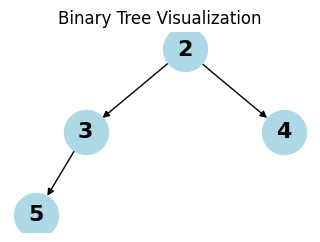

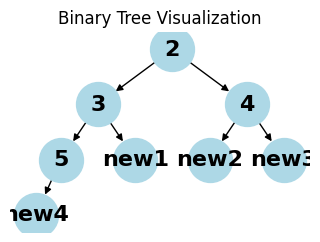

In [107]:
def insert_node(root: Node, key):
    """"""
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.left:
            queue.append(node.left)
        else:
            node.left = Node(key=key, left=None, right=None, parent=node)
            break

        if node.right:
            queue.append(node.right)
        else:
            node.right = Node(key=key, left=None, right=None, parent=node)
            break
    
root = _create_dummy_node()
visualize_tree(root)
insert_node(root, "new1")
insert_node(root, "new2")
insert_node(root, "new3")
insert_node(root, "new4")
visualize_tree(root)

### Deletion

Deleting a node requires choosing a traversal method, finding the node to delete, then promoting a child node to the level of the parent node to preserve the tree's structure

### Search

## Types of binary trees

- By children
  - Full
  - Degenerate
  - Skewed
- By levels
  - Complete
  - Perfect
  - Balanced
- By values
  - Binary search tree
  - AVL
  - Red Black
  - B
  - B+
  - Segment

In [102]:
#| hide
import nbdev; nbdev.nbdev_export()